<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/MachineLearningPrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSCI 6505 - Machine Learning 

## Data Dimensionality Reduction 
### Principal Components Analysis for Data Visualization

### Dalhousie University
### Juan C. Reyes

#### PCA for Data Visualization: The IRIS Dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Import the Iris Dataset

In [0]:
from sklearn.datasets import load_iris

iris_data_sk = load_iris() #import data from the sklearn datasets library

iris_data_pd = pd.DataFrame(iris_data_sk.data, columns = iris_data_sk.feature_names) #convert to a pandas dataframe
iris_data_pd['target'] = pd.Series(iris_data_sk.target) #create and append a new column for target features

#dataset feature names
features = iris_data_pd.columns[0:4] #the feature names of the IRIS dataset 
#######target value dictionaries########

#dictionary containing numeric index values to convert target names
dictionary = {
    0: str(iris_data_sk.target_names[0]),
    1: str(iris_data_sk.target_names[1]),
    2: str(iris_data_sk.target_names[2])
}

#dictionary containing  target names to index value
inverted_dict = dict(map(reversed, dictionary.items()))

##Converting numeric indices to their names
iris_data_pd = iris_data_pd.replace({'target': dictionary})
##Converting names back to numeric indices
#iris_data_pd = iris_data_pd.replace({'target': inverted_dict})
#Another way of doing so
#iris_data_pd["target"] = iris_data_pd["target"].map(inverted_dict)

Obtain general information regarding the dataset:

In [3]:
iris_data_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Observe the first 5 rows from the dataset:

In [4]:
iris_data_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Obtain more general statistics by creating a pairplot using the seaborn library.

A pairplot plots the pairwise relationships in the datset. 
The function creates a grid of Axes such that each numeric variable in data is shared in the y-axis across a single row, and in the x-axis across a single column.

The diagonal axes draw a plot to show the univariate distribution of the data for the variable in that column.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


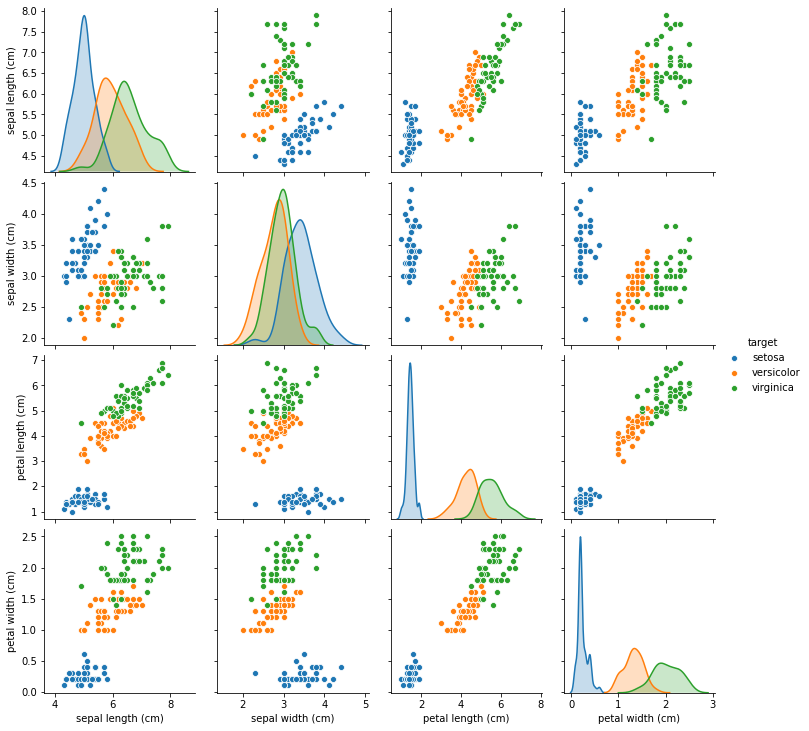

In [5]:
import seaborn as sb
sb.pairplot(iris_data_pd.dropna(), hue='target');

# Preparation for applying Principal Components Analysis

Begin by partitioning our data.

x: contains our feature's data.

y: contains our target values.

In [0]:
x = iris_data_pd.loc[:,features].values
y = iris_data_pd.loc[:, ['target']].values

We apply the fit_transform() function to take our data, calculate the average and standard deviation. Given these parameters we apply sklearn's StandardScaler() function which standardizes features by removing the mean and scaling to unit variance.


In [0]:
x = StandardScaler().fit_transform(x)

## Display the scaled data:

In [8]:
pd.DataFrame(data = x, columns = features ).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Principal Components Analysis

**Principal components analysis** (PCA) is one of a family of techniques for taking high-dimensional data, and using the dependencies between the variables to represent it in a more tractable, lower-dimensional form. PCA is a relatively simple way of performing **dimensionality reduction**. 

It turns out that the geometry of the resulting coordinate system is determined by the Principal Components that are uncorrelated (orthogonal) to each other, but display maximal correlation with the measurements.

In the following code we will apply PCA to the scaled IRIS data to obtain the data onto a q=4 dimensional space. We will then project onto lower dimensions to visualize the data and study wether the technique was helpful in classifying the distinct IRIS classes.

Retaining Four Dimensions:

In [9]:
n_components = 4
pca= PCA(n_components)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents,
                           columns = ['PCA1','PCA2','PCA3','PCA4'])

principalDF

,PCA1,PCA2,PCA3,PCA4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [10]:
iris_data_pd['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [11]:
principalDFcomp = pd.concat([principalDF, iris_data_pd[['target']]],axis = 1)
principalDFcomp

,PCA1,PCA2,PCA3,PCA4,target
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,virginica
146,1.564580,-0.896687,-0.026371,-0.220192,virginica
147,1.521170,0.269069,0.180178,-0.119171,virginica
148,1.372788,1.011254,0.933395,-0.026129,virginica


# Two-Dimensional Visualization

We begin by projecting our four dimensional data onto two dimensions to visualize all our data in this space.


In [12]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter(df, x=principalDFcomp.columns[0], y=principalDFcomp.columns[1], color="target")
fig.show()

We obtain a plot of the coefficients of the data with respect to the first two singular vectors. As we will find out later, this 2D view encomasses 95% of the variation of the original data points. We can see a better way of separating Iris Setosa from Iris Versicolor and Iris Virginica.

Let's do the same thing but plot our data using the last two principal components.

In [13]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter(df, x=principalDFcomp.columns[2], y=principalDFcomp.columns[3], color="target")
fig.show()

As we can see, this space is a bad representation for visualizing our data since we are not able to distinguish between the different IRIS classes clearly.

Let's take a look at this data in a three dimensional principal component space.

## Plotting the data with the first three Principal Components

In [14]:
import plotly.express as px
df = principalDFcomp
fig = px.scatter_3d(df, x=principalDFcomp.columns[0], y=principalDFcomp.columns[1], z=principalDFcomp.columns[2], color="target",
                  symbol="target", 
                  color_discrete_map = {principalDFcomp.columns[0]: "blue", principalDFcomp.columns[1]: "green", principalDFcomp.columns[2]:"red"})

fig.update_traces(marker=dict(size=5,
                              line=dict(width=8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()



By using the first three principal components we see a much better separation between classes.

Versicolor and Virginica could see a better separation for the first two principal components.

# The Explained Variance

The explained variance gives us information (variance) that can be associated to each principal component. 

In [15]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

The results show that the first two principal components are able to retain about 94% of the information stored in the data. The first principal component retains 73% of the variance, and the second principal component contains about 22.85% of the variance. The third and fourth principal components contain the rest of the variance in the dataset.

## PCA for Feature Selection:

## Data Dimensionality Reduction 
### Principal Components Analysis for Feature Selection

#### The MNIST Dataset

Lets begin by importing the necessary packages for this notebook:

I will begin by running the MNIST through a  basic feed forward Neural Network in Sklearn which I know gives accurate results. I will then test my PCA data through it to confirm its accuracy. Then, once we can confirm results, we reconstruct the 28x28 images from the PCA retained features to train the neural network from Question 1 to classify MNIST images.

In [16]:
%matplotlib inline
%tensorflow_version 1.x

import numpy as np

# PyTorch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# torchvision for loading MNIST dataset
import torchvision
from torchvision import datasets, transforms

# For plotting
import matplotlib.pyplot as plt

from keras import models, layers, optimizers, utils

TensorFlow 1.x selected.


Using TensorFlow backend.


In [17]:
# Download the training data
train_data = datasets.MNIST('./mnist_data', download=True, train=True,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,) 
                              )
                            ]))

# Download the test data
test_data = datasets.MNIST('./mnist_data', download=True, train=False,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))

classes = [i for i in range(10)]

print("Training examples: ", len(train_data))
print("Test examples: ", len(test_data))

print(type(train_data))
print(type(test_data))
################ Import Data ################

train_batch_size = 60000
test_batch_size = 10000

train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

for i, data in enumerate(train_loader, 0):
      x_training, y_training = data
      
for i, data in enumerate(test_loader, 0):
      x_test, y_test = data

print("x_training type: " + str(type(x_training)))
print("x_training shape: " + str(x_training.shape))

print("x_test type: " + str(type(x_test)))
print("x_training shape: " + str(x_test.shape))


Training examples:  60000
Test examples:  10000
<class 'torchvision.datasets.mnist.MNIST'>
<class 'torchvision.datasets.mnist.MNIST'>
x_training type: <class 'torch.Tensor'>
x_training shape: torch.Size([60000, 1, 28, 28])
x_test type: <class 'torch.Tensor'>
x_training shape: torch.Size([10000, 1, 28, 28])


Convert data to numpy arrays to work with them:

In [18]:
x_training_np = x_training.numpy()
y_training_np = y_training.numpy()

x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

print(type(x_training_np))
print(x_training_np.shape)

print(type(y_training_np))
print(y_training_np.shape)

print(type(x_test_np))
print(x_test_np.shape)

print(type(y_test_np))
print(y_test_np.shape)

<class 'numpy.ndarray'>
(60000, 1, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
(10000, 1, 28, 28)
<class 'numpy.ndarray'>
(10000,)


Create copies of the data:

In [0]:
x_training_np_copy = np.copy(x_training_np)
y_training_np_copy = np.copy(y_training_np)

x_test_np_copy = np.copy(x_test_np)
y_test_np_copy = np.copy(y_test_np)

Data Reshaping:
Turning each of our 28x28 images into a one dimensional vector.

In [0]:
x_training_np = x_training_np.reshape(train_batch_size,784)
x_test_np = x_test_np.reshape(test_batch_size,784)

One hot encoding of labels :

In [0]:
y_training_np = utils.to_categorical(y_training_np, 10)
y_test_np = utils.to_categorical(y_test_np, 10)

Let's take a look at the type and shape of our data:

In [22]:
print(type(x_training_np))
print(x_training_np.shape)

print(type(y_training_np))
print(y_training_np.shape)

print(type(x_test_np))
print(x_test_np.shape)

print(type(y_test_np))
print(y_test_np.shape)

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)


Our data is ready to go. Let's first evaluate our Sklearn Neural Network to verify it is running properly.

# Feed Forward Neural Network 

## Number of Neurons in Hidden Layer: 128 

## Hidden Layer Activation Function:
$f(x) = tanh(x)$

## Number of Neurons in the output layer: 10 (one for each one-hot encoded vector)

## Output layer Activation Function (Softmax):
$f(x)_{i} = \frac{e^{z_{i}}}{\sum_{j=1} ^{K} e^{z_{j}} }$ for i = 1,...,K and $z = (z_{1},...,z_{K}) \in \mathbb{R}$

Loss Function: Cross Entropy Loss

$Cross Entropy Loss = - \sum_{i}^{C} t_{i}log(f(s)_{i})$

Optimizer: Nadam,
Batch Size: 128,
Epochs = 10






In [28]:
inputs = layers.Input(shape=(784,))
x = layers.Dense(128, activation='tanh')(inputs)

outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(x_training_np, y_training_np,
            batch_size=128,
            epochs=10,
            validation_data=(x_test_np, y_test_np))
score = model.evaluate(x_test_np, y_test_np)
print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3446 - acc: 0.8982 - val_loss: 0.1907 - val_acc: 0.9427
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1611 - acc: 0.9534 - val_loss: 0.1448 - val_acc: 0.9568
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1243 - acc: 0.9629 - val_loss: 0.1321 - val_acc: 0.9623
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1031 - acc: 0.9692 - val_loss: 0.1223 - val_acc: 0.9623
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0928 - acc: 0.9724 - val_loss: 0.1086 - val_acc: 0.9661
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0882 - acc: 0.9736 - val_loss: 0.1246 - val_acc: 0.9620
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0858 - acc: 0.9743 - val_loss: 0.1069 - val_acc

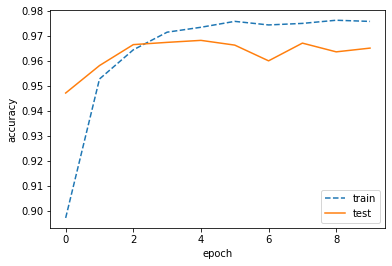

In [26]:
# Plotting learning curves
plt.plot(history.history['acc'],'--')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

We have run the original MNIST dataset through the Neural Network and obtained a test accuracy of 97% on the hidden test data. Now that we know this standard NN works on MNIST, let us try this on the features we retain from a Principal Component Analysis.

The dimensions of the MNIST dataset is 784, let's apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset in accordance to a set variance threshold (information retained) of our interest.

Recall our training and test data:

In [32]:
print(type(x_training_np))
print(type(y_training_np))
print(type(x_test_np))
print(type(y_test_np))

print(x_training_np.shape)
print(y_training_np.shape)
print(x_test_np.shape)
print(y_test_np.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Let's commence the PCA using Sklearn. Begin by scaling the data:

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##Fit on the training set
scaler.fit(x_training_np)

##Apply the transform to the training and test set
train_images = scaler.transform(x_training_np)
test_images = scaler.transform(x_test_np)

print(type(train_images))
print(type(test_images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Create PCA variables for each of the PCA variance levels we want (95%,90%,75%,50%).

In [0]:
from sklearn.decomposition import PCA
pca1 = PCA(.95)
pca2 = PCA(.90)
pca3 = PCA(.75)
pca4 = PCA(.50)

### Fit the training model and reduce data dimension

In [39]:
pca1.fit(train_images)
print("pca1 components: " + str(pca1.n_components_))

pca2.fit(train_images)
print("pca2 components: " + str(pca2.n_components_))

pca3.fit(train_images)
print("pca3 components: " + str(pca3.n_components_))

pca4.fit(train_images)
print("pca4 components: " + str(pca4.n_components_))


pca1 components: 331
pca2 components: 236
pca3 components: 120
pca4 components: 39


With a variance level of 95% the data has been reduced from a dimension of 784 to 331.

With a variance level of 90% the data has been reduced from a dimension of 784 to 236.

With a variance level of 75% the data has been reduced from a dimension of 784 to 120.

With a variance level of 50% the data has been reduced from a dimension of 784 to 39.

In [0]:
train_img_95 = pca1.transform(train_images)
test_img_95 = pca1.transform(test_images)

train_img_90 = pca2.transform(train_images)
test_img_90 = pca2.transform(test_images)

train_img_75 = pca3.transform(train_images)
test_img_75 = pca3.transform(test_images)

train_img_50 = pca4.transform(train_images)
test_img_50 = pca4.transform(test_images)

# Applying the reduced data to the same Neural Network as before:
Variance level: 95%

In [42]:
inputs = layers.Input(shape=(train_img_95.shape[1],))
x = layers.Dense(128, activation='tanh')(inputs)
#x = layers.Dense(128, activation='tanh')(x)
outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(train_img_95,y_training_np,
            batch_size=128,
            epochs=10,
            validation_data=(test_img_95, y_test_np))
score = model.evaluate(test_img_95, y_test_np)
print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.3535 - acc: 0.8971 - val_loss: 0.2054 - val_acc: 0.9396
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1605 - acc: 0.9532 - val_loss: 0.1645 - val_acc: 0.9506
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1095 - acc: 0.9684 - val_loss: 0.1413 - val_acc: 0.9589
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0777 - acc: 0.9790 - val_loss: 0.1376 - val_acc: 0.9611
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0570 - acc: 0.9843 - val_loss: 0.1328 - val_acc: 0.9622
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0417 - acc: 0.9892 - val_loss: 0.1333 - val_acc: 0.9633
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0316 - acc: 0.9927 - val_loss: 0.1340 - val_acc

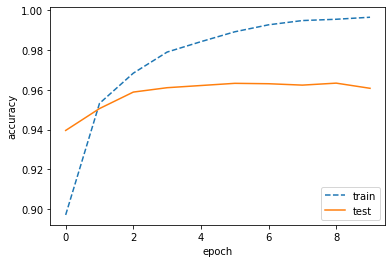

In [43]:
# Plotting learning curves
plt.plot(history.history['acc'],'--')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Variance level: 90%

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3499 - acc: 0.8984 - val_loss: 0.2089 - val_acc: 0.9385
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1612 - acc: 0.9533 - val_loss: 0.1677 - val_acc: 0.9497
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1130 - acc: 0.9676 - val_loss: 0.1440 - val_acc: 0.9580
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0843 - acc: 0.9762 - val_loss: 0.1347 - val_acc: 0.9604
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0662 - acc: 0.9813 - val_loss: 0.1324 - val_acc: 0.9623
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0515 - acc: 0.9862 - val_loss: 0.1302 - val_acc: 0.9626
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0418 - acc: 0.9889 - val_loss: 0.1369 - val_acc

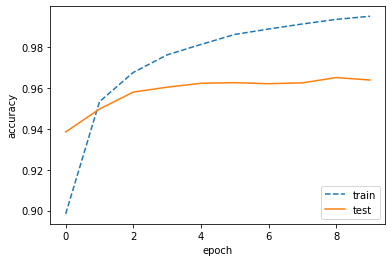

In [44]:
inputs = layers.Input(shape=(train_img_90.shape[1],))
x = layers.Dense(128, activation='tanh')(inputs)
#x = layers.Dense(128, activation='tanh')(x)
outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(train_img_90,y_training_np,
            batch_size=128,
            epochs=10,
            validation_data=(test_img_90, y_test_np))
score = model.evaluate(test_img_90, y_test_np)
print('Test loss:', score[0],'Test accuracy:', score[1])

# Plotting learning curves
plt.plot(history.history['acc'],'--')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Variance level: 75%

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3565 - acc: 0.8940 - val_loss: 0.2109 - val_acc: 0.9402
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1725 - acc: 0.9502 - val_loss: 0.1649 - val_acc: 0.9528
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1267 - acc: 0.9635 - val_loss: 0.1446 - val_acc: 0.9586
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1008 - acc: 0.9714 - val_loss: 0.1350 - val_acc: 0.9601
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0837 - acc: 0.9757 - val_loss: 0.1324 - val_acc: 0.9630
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0700 - acc: 0.9793 - val_loss: 0.1279 - val_acc: 0.9624
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0608 - acc: 0.9828 - val_loss: 0.1288 - val_acc

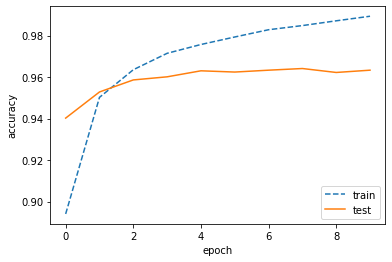

In [45]:
inputs = layers.Input(shape=(train_img_75.shape[1],))
x = layers.Dense(128, activation='tanh')(inputs)
#x = layers.Dense(128, activation='tanh')(x)
outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(train_img_75,y_training_np,
            batch_size=128,
            epochs=10,
            validation_data=(test_img_75, y_test_np))
score = model.evaluate(test_img_75, y_test_np)
print('Test loss:', score[0],'Test accuracy:', score[1])

# Plotting learning curves
plt.plot(history.history['acc'],'--')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Variance Level 50%

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3918 - acc: 0.8841 - val_loss: 0.2306 - val_acc: 0.9298
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1965 - acc: 0.9415 - val_loss: 0.1742 - val_acc: 0.9485
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1513 - acc: 0.9552 - val_loss: 0.1524 - val_acc: 0.9542
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1275 - acc: 0.9626 - val_loss: 0.1402 - val_acc: 0.9585
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1102 - acc: 0.9675 - val_loss: 0.1335 - val_acc: 0.9605
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0982 - acc: 0.9707 - val_loss: 0.1294 - val_acc: 0.9604
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0885 - acc: 0.9732 - val_loss: 0.1289 - val_acc

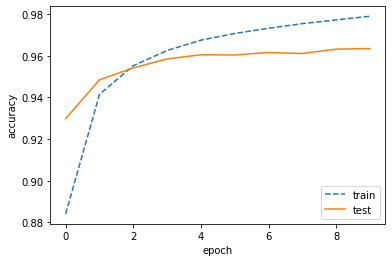

In [46]:
inputs = layers.Input(shape=(train_img_50.shape[1],))
x = layers.Dense(128, activation='tanh')(inputs)
#x = layers.Dense(128, activation='tanh')(x)
outputs= layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

history=model.fit(train_img_50,y_training_np,
            batch_size=128,
            epochs=10,
            validation_data=(test_img_50, y_test_np))
score = model.evaluate(test_img_50, y_test_np)
print('Test loss:', score[0],'Test accuracy:', score[1])

# Plotting learning curves
plt.plot(history.history['acc'],'--')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

From running our PCA on our reduced data, we can see that the neural network is able to still make good predictions on our test data. I expect datasets with higher variance to be more accurate than datasets with less variance as they are able to retain less information than the former.

## (ii) Approximating high dimensional structure from lower dimensional data.

### Reconstructing 28x28 images from the retained features of the PCA's.

In [47]:
##Training Images
approx95 = pca1.inverse_transform(train_img_95)
approx90 = pca2.inverse_transform(train_img_90)
approx75 = pca3.inverse_transform(train_img_75)
approx50 = pca4.inverse_transform(train_img_50)

##Testing Images

approx95_test = pca1.inverse_transform(test_img_95)
approx90_test = pca2.inverse_transform(test_img_90)
approx75_test = pca3.inverse_transform(test_img_75)
approx50_test = pca4.inverse_transform(test_img_50)

print(approx95.shape)
print(approx90.shape)
print(approx75.shape)
print(approx50.shape)

(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)


Image reconstruction with increasing variance levels:

label: 3


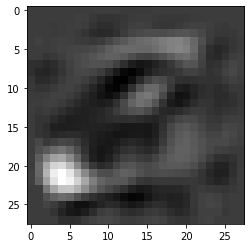

In [64]:
plt.imshow(approx50[0].reshape(28,28),cmap=plt.cm.gray)
print("label: " + str(y_training_np_copy[0]))

label: 3


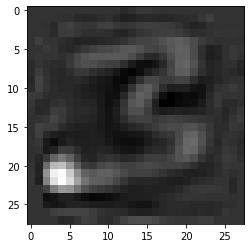

In [65]:
plt.imshow(approx75[0].reshape(28,28),cmap=plt.cm.gray)
print("label: " + str(y_training_np_copy[0]))

label: 3


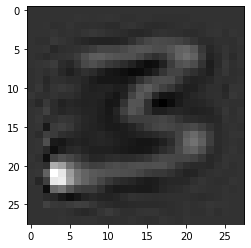

In [66]:
plt.imshow(approx90[0].reshape(28,28),cmap=plt.cm.gray)
print("label: " + str(y_training_np_copy[0]))

label: 3


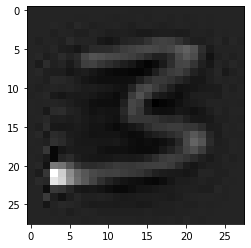

In [67]:
plt.imshow(approx95[0].reshape(28,28),cmap=plt.cm.gray)
print("label: " + str(y_training_np_copy[0]))

The original image:

label: 3


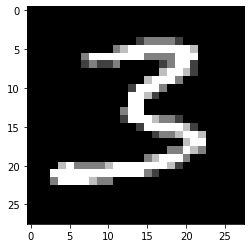

In [68]:
plt.imshow(x_training_np[0].reshape(28,28),cmap=plt.cm.gray)
print("label: " + str(y_training_np_copy[0]))

Now that we know the Neural Network (in Sklearn) works, we can train the Neural Network from Question 1 with the retained features.

# Part (ii)

## The Neural Network:

Initializing the network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  0.9189666666666667
Test accuracy:  0.9244


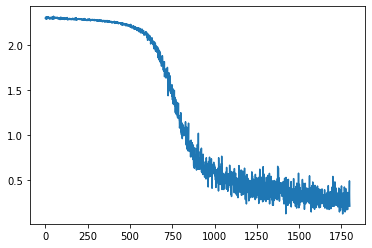

In [69]:
def eval_net(epochs, batch_size):

  ##### Prepare return values ##################################################
  losses = []
  train_acc = 0
  test_acc = 0

  ##### Create iterators for each dataset ######################################
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

  ##### Define the network #####################################################
  class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 6, 3)     # 1 channel in, 6 filters out, 3x3 filters
      self.pool = nn.MaxPool2d(2, 2)      # 2x2 pooling, with a stride of 2 (move the window by 2 pixels)
      self.conv2 = nn.Conv2d(6, 16, 3)    # 6 filters in, 16 filters out, 3x3 filters
      self.fc1 = nn.Linear(16 * 5 * 5, 120) # the 16 filtered images are reduced to 5x5 now, connect to 120 hidden units out
      self.fc2 = nn.Linear(120, 84)       # 120 hidden units in, 84 hidden units out
      self.fc3 = nn.Linear(84, 10)        # 84 hidden units in, 10 outputs units

    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 16 * 5 * 5) # .view() is similar to .reshape(), so this flattens x into a vector
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.log_softmax(self.fc3(x), dim=1)
      return x
  
  ##### Initialize the network and optimizer ###################################
  print("Initializing the network ...")
  net = Net()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # lr = learning rate/step size

  ##### Training the network ###################################################
  print("Training the network ...")
  for e in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", e+1)
    for i, data in enumerate(train_loader, 0):
      inputs, labels = data
      optimizer.zero_grad() # zero the parameter gradients

      outputs = net(inputs) # forward pass
      loss = criterion(outputs, labels) # compute loss
      loss.backward() # backward pass
      optimizer.step() # gradient descent update

      losses.append(loss.item())

  ##### Evaluating the network on training data ################################
  print("Evaluating on training data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      inputs, labels = data
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  train_acc = correct / total

  ##### Evaluating the network on test data ####################################
  print("Evaluating on test data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
      inputs, labels = data
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  test_acc = correct / total

  return losses, train_acc, test_acc, net

losses, train_acc, test_acc,thenet = eval_net(epochs=3, batch_size=100)
print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)
plt.plot(losses)
plt.show()